Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  Streami

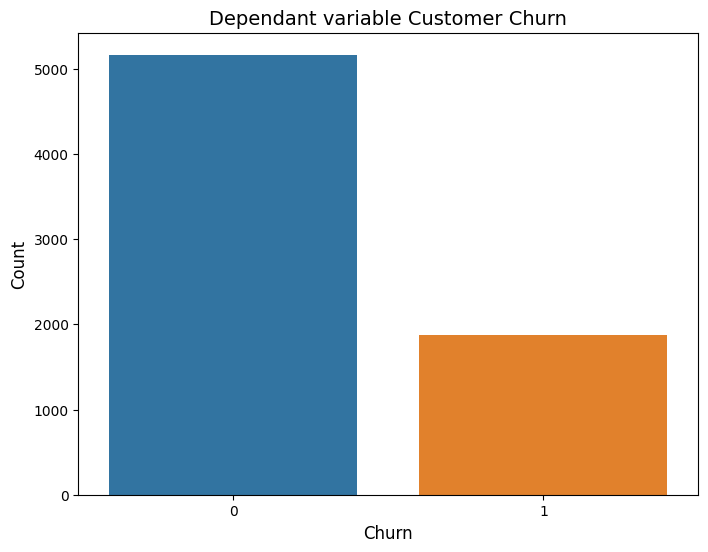

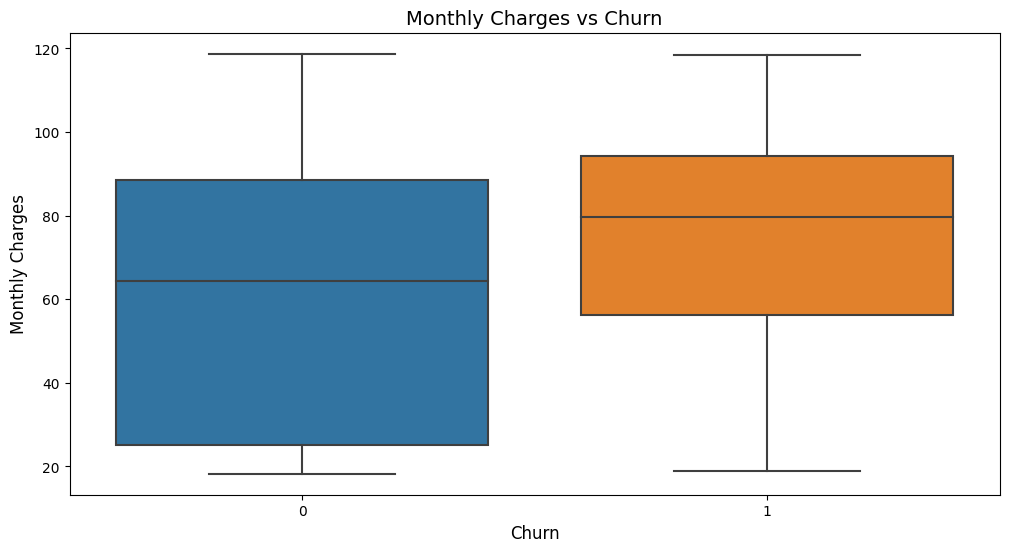

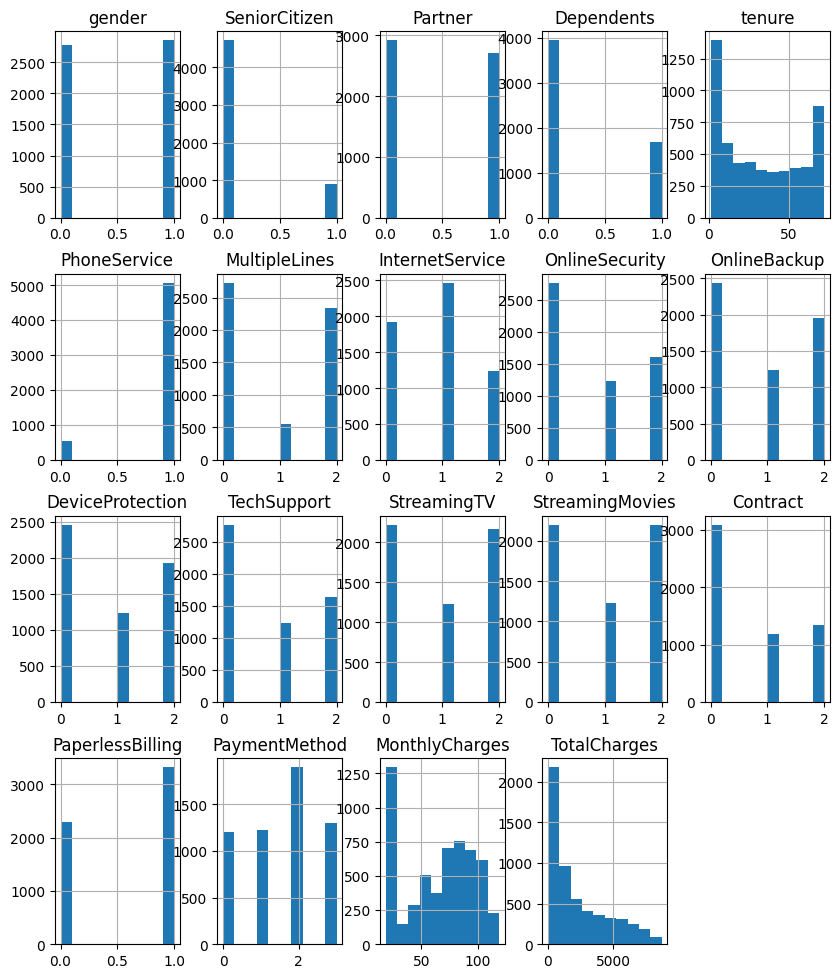

Model Accuracy:
Model Accuracy: 0.7839374555792467
Model Confusion Matrix:
[[915 118]
 [186 188]]
Model Accuracy:
Model Accuracy: 0.7725657427149965
Model Confusion Matrix:
[[921 112]
 [208 166]]


'We can see that the logistic regression model performs better than the KNN model in predicting the customer churn status.\n\nAccuracies:\n\nThe accuracies being:\nLogistic regression:0.7839,This is a correct prediction of customer churn of 78.39%.\n\nKnearest neighbour:0.7726,This model performs poorly in this dataset therefore Logistic regression is a chose for predicting customer churn.\n\n confusion matrix:\n \n model correctly predicted 915 customers as not churned and 188 customers as churned, but it incorrectly predicted 118 customers as churned and 186 customers as not churned.\n\nOverall:\n\n the model seems to be performing better.\n\n###Conclusion\n\nUsing the model above ,by campanies through the past data for the past clients and their churn the company is able to predict whether the customer will churn or not using the model developed above.\n\nThe target variable Churn contains 2 classes Yes and No. Yes means that the client leaves the company and No means the client sta

In [ ]:


#import the libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

""" # mount my Google Drive on runtime"""

from google.colab import drive
drive.mount('/content/drive')

# # In Colab notebook, use command !upzip this zip file, and save the unzipped file,WA_Fn-UseC_-Telco-Customer-Churn.csv, in a folder:
# !unzip 'drive/MyDrive/Colab Notebooks/assignzip/archive_churn.zip' -d 'drive/MyDrive/Colab Notebooks/LinearMultivariate/unzippedcsv'

# specify the path and file name:
path_to_file = 'drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv'

# use pandas to read this csv file
dataset = pd.read_csv(path_to_file)

"""# Exploratory analysis"""

dataset.info()

dataset.head() #displays first 5 rows

dataset.describe(include='all')

print(dataset.describe())

# checking if there are any duplicated rows in the dataset
# print('//////////////////////////')
# print(dataset.columns.duplicated().sum())
# print('//////////////////////////')


"""####Cleaning the dataset"""

dataset.isnull()#check for null values
print('//////////////////////////')
print(dataset.isnull().sum())#including sum of nulls if any
print('//////////////////////////')


dataset.drop('customerID', axis=1, inplace=True)#id will not be important for prediction

dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')
dataset.dropna(inplace=True)

"""###transforming the features of the data to suit the task at hand"""

# Encoding categorical variables
for col in dataset.select_dtypes(include=['object']).columns:
    dataset[col] = pd.Categorical(dataset[col]).codes

"""###Data visualization for categoricals variables"""

# Visualization
plt.figure(figsize=(8, 6))
sn.countplot(x='Churn', data=dataset)
plt.title('Dependant variable Customer Churn', fontsize=14)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

"""The histogram shows the relationship between the churn variable and the count on y axis.The churn which is represented by either 'Yes' or 'No'"""

#Visalization 2

plt.figure(figsize=(12, 6))
sn.boxplot(x='Churn', y='MonthlyCharges', data=dataset)
plt.title('Monthly Charges vs Churn', fontsize=14)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Monthly Charges', fontsize=12)
plt.show()

"""The boxplot shows the relationship between monthly charges and churn, which is represented on the x-axis as either "Yes" or "No".
From the above box plot we do not have outlier variable.
It shows monthly charges for the customer group.

####Subsetting the dataset.
"""

#Subsetting the dataset.
# Data splitting
X = dataset.drop('Churn', axis=1)
y = dataset['Churn']

"""#splitting the dataset"""

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

"""###Visualizing the numericals"""

# plotting histograms of the various attributes using 10 bins
X_train.hist(bins=10, figsize=(10, 15), layout=(5,5))
plt.show()

"""From the above we can show that Monthly charges and Totalcharges have large range compared with others.The other columns are smaller and nearly the same.
We will performing encoding to solve this main case so as to provide higher accuracy of our output

# Model selection 1
"""

# Logistic Regression
logstic_model = LogisticRegression()
logstic_model.fit(X_train, y_train)
y_pred = logstic_model.predict(X_test)
print("Model Accuracy:")
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

"""#model selection-2"""

# Model selection - KNN
kneighbour_model = KNeighborsClassifier(n_neighbors=5)
kneighbour_model.fit(X_train, y_train)
y_pred = kneighbour_model.predict(X_test)
print("Model Accuracy:")
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

"""We can see that the logistic regression model performs better than the KNN model in predicting the customer churn status.

Accuracies:

The accuracies being:
Logistic regression:0.7839,This is a correct prediction of customer churn of 78.39%.

Knearest neighbour:0.7726,This model performs poorly in this dataset therefore Logistic regression is a chose for predicting customer churn.

 confusion matrix:

 model correctly predicted 915 customers as not churned and 188 customers as churned, but it incorrectly predicted 118 customers as churned and 186 customers as not churned.

Overall:

 the model seems to be performing better.

###Conclusion

Using the model above ,by campanies through the past data for the past clients and their churn the company is able to predict whether the customer will churn or not using the model developed above.

The target variable Churn contains 2 classes Yes and No. Yes means that the client leaves the company and No means the client stayed.

For example if company  realizes customers leave they will put measures like
Giving promotions and discounts on the services they offer.This will in return keep the already existing customers and attract more.
"""